__import the libraries__

**Task 5.7.1:** Import the libraries you'll need. You can update this cell and re-run it as you discover more things later.

In [ ]:
!pip install medigan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/

In [ ]:
!pip install numpy pyyaml opencv-contrib-python-headless torch torchvision dominate visdom Pillow imageio scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 MB 14.0 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=e1a3da6768f35785c269b831b6e452c58dcfd23e8b11f2d885e1ee2386db6d14
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom


In [ ]:
# Import the libraries that you need
# Import the libraries that you need
from pathlib import Path

import medigan
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import make_grid
from tqdm.notebook import tqdm

**Task 5.7.2:** Check the availability of GPUs on this machine and determine the correct device name. Store the device name in the variable `device`.

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")


Using cuda device.


### __Getting Images__

 __Since I don't have a collection of images to work with. Instead,I use Medigan generate them.__

**Task 5.7.3:** Find a GAN in Medigan that produces `mammogram` images with the `roi` ("region of interest") marked, and save its id to `model_id`. You'll need to create the entry-point for Medigan as well.

In [ ]:
# Create the connection to the Medigan generators
generators = medigan.Generators()

# Find the models that match what we want
generators = medigan.Generators()
models = generators.find_matching_models_by_values(["mammogram", "roi"])
print(models)

[ModelMatchCandidate(model_id=00004_PIX2PIX_MMG_MASSES_W_MASKS, is_match=True, operator: AND, target_values=['mammogram', 'roi'])]


**Task 5.7.4:** Get the configuration for the model you found using the `model_id`. Save the model configuration to the `model_config` variable.

In [ ]:
model_config = generators.get_config_by_id(model_id = model_id)

print(f"Model keys: {model_config.keys()}")

Model keys: dict_keys(['execution', 'selection', 'description'])


**Task 5.7.5:** Select the `generates`, `tags`, `height`, and `width` keys from the `selection` key in the model configuration. Save the result to `model_info`, a dictionary that maps the selected keys to their values.

In [ ]:
vals = ["generates", "tags", "height", "width"]
model_info = {x: model_config["selection"][x] for x in vals}

model_info

{'generates': ['regions of interest',
  'ROI',
  'mammograms',
  'patches',
  'full-field digital mammograms'],
 'tags': ['Mammogram',
  'Mammography',
  'Digital Mammography',
  'Full field Mammography',
  'Full-field Mammography',
  'pix2pix',
  'Pix2Pix',
  'Mass segmentation',
  'Breast lesion'],
 'height': 256,
 'width': 256}

**Task 5.7.6:** Create a path to the directory `output/sample_mammogram.` Use `Pathlib`.

In [ ]:
output_dir = Path("output")
sample_dir = output_dir / "sample_mammogram"

# Create the directory with mkdir
sample_dir.mkdir(parents=True, exist_ok=True)

print(sample_dir)

output/sample_mammogram


If something goes wrong, you can delete the whole directory and start over:

In [ ]:
!rm -Rf output/

**Task 5.7.7:** Generate 4 images of mammograms with region of interest using our selected GAN. Save them to `sample_dir`.

In [ ]:
generators.generate(
    model_id=model_id,
    num_samples=4,
    output_path=sample_dir,
    install_dependencies=True  # Automatically install missing dependencies
)


100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


**Task 5.7.8:** Finish up the missing parts of the function `view_images`. Invoke the function and store the resulting image in the variable `sample_images`.

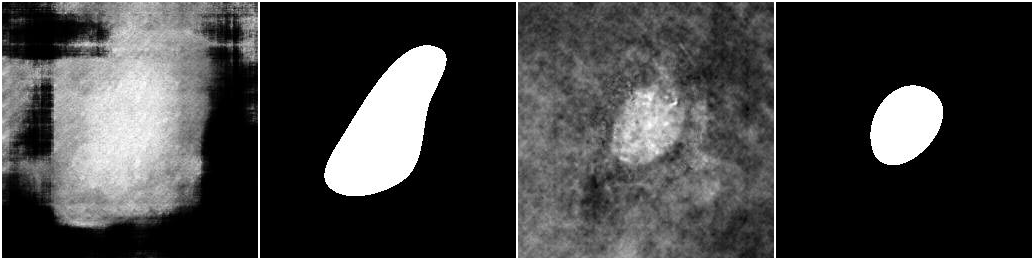

In [ ]:
def view_images(directory, num_images=4, glob_rule="*.jpg"):
    """Displays a sample of images in the given directory
    They'll display in rows of 4 images
    - directory: which directory to look for images
    - num_images: how many images to display (default 4, for one row)
    - glob_rule: argument to glob to filter images (default "*" selects all)"""

    image_list = list(directory.glob(glob_rule))  # REMOVERHS
    num_samples = min(num_images, len(image_list))
    images = [read_image(str(f)) for f in sorted(image_list)[:num_samples]]  # REMOVERHS
    grid = make_grid(images, nrow=4, pad_value=255.0)
    return torchvision.transforms.ToPILImage()(grid)

sample_images = view_images(sample_dir)
sample_images

**Task 5.7.9:** Use Medigan to create a data loader of training data. Make 50 images, in batches of 4, with shuffling turned on. Don't forget to set `prefetch_factor=None`. This may take a few minutes to run.

In [ ]:
train_dataloader = generators.get_as_torch_dataloader(
    model_id=model_id, num_samples=50, batch_size=4, shuffle=True, prefetch_factor=None
)

sample_batch = next(iter(train_dataloader))
print(f"Training data loader with keys: {sample_batch.keys()}")


Training data loader with keys: dict_keys(['sample', 'mask'])


**Task 5.7.10:** Use Medigan to create a data loader of validation data. This time only create $30$ images and don't shuffle. All other settings should be the same.

In [ ]:
val_dataloader = generators.get_as_torch_dataloader(
    model_id=model_id, num_samples=30, batch_size=4, shuffle=False, prefetch_factor=None
)

val_batch = next(iter(train_dataloader))
shape = val_batch["sample"].shape
dtype = val_batch["sample"].dtype
print(f"Validation image with data shape {shape} and type {dtype}")


Validation image with data shape torch.Size([4, 256, 256]) and type torch.float32


**Task 5.7.11:** Get the shape and type for the `mask` component of the `val_batch`.

In [ ]:
shape = val_batch["mask"].shape
dtype = val_batch["mask"].dtype

print(f"Validation mask with data shape {shape} and type {dtype}")

Validation mask with data shape torch.Size([4, 256, 256]) and type torch.uint8


We'll need to fix this, we need the images to be `[3, 256, 256]` and the mask to be `[1, 256, 256]`, and both to have type `float32`. This function converts the type and adds the channels.

In [ ]:
def convert_to_torch_image(tensor, color=False):
    tensor_float = tensor.type(torch.float32)
    grayscale = tensor_float.unsqueeze(1)
    if color:
        return grayscale.repeat(1, 3, 1, 1)
    else:
        return grayscale

**Task 5.7.12:** Run this function on the `mask` component of `val_batch` and get the new shape and type.

In [ ]:
mask_converted = convert_to_torch_image(val_batch["mask"])

shape = mask_converted.shape
dtype = mask_converted.dtype

print(f"Validation mask with data shape {shape} and type {dtype}")

Validation mask with data shape torch.Size([4, 1, 256, 256]) and type torch.float32


**Task 5.7.13:** Run this function on the `sample` component of `val_batch` and get the new shape and type. You'll need to specify `color=True` to get RGB images.

In [ ]:
sample_converted = convert_to_torch_image(val_batch["sample"], color=True)

shape = sample_converted.shape
dtype = sample_converted.dtype

print(f"Validation mask with data shape {shape} and type {dtype}")

Validation mask with data shape torch.Size([4, 3, 256, 256]) and type torch.float32


### __Creating a Model__

Now that we have our data, we'll want to train a model. This is a segmentation problem, and we found a good pre-trained model for that in one of the lessons. Let's use that one.

**Task 5.7.14:** Load the pre-trained `deeplabv3_resnet50` model. Use the `COCO_WITH_VOC_LABELS_V1` weights.

In [ ]:
pretrained_weights = (
    torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1
)

model = torchvision.models.segmentation.deeplabv3_resnet50(weights=pretrained_weights)

print("Model components:")
for name, part in model.named_children():
    print("\t" + name)

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 143MB/s]


Model components:
	backbone
	classifier
	aux_classifier


we'll need to replace the final layer with one that does what we need. But first we should see what we get from the model. This model gives a dictionary with two outputs: out and aux. We only want out

**Task 5.7.15:** Run the model on the `sample` part of our `sample_batch`, and get the shape of the `out` part of the result. You'll need to convert the data to the correct format.

In [ ]:
sample_converted = convert_to_torch_image(sample_batch["sample"], True)
model_result = model(sample_converted)
model_out = model_result["out"]
out_shape = model_out.shape

out_shape

torch.Size([4, 21, 256, 256])

This doesn't match our masks. It's the right height and width, but the wrong number of channels. We'll replace that last layer. It's a convolution, but not the one we need.

In [ ]:
model.classifier[-1]

Conv2d(256, 21, kernel_size=(1, 1), stride=(1, 1))

**Task 5.7.16:** Replace the last layer in the classifier with a convolution that gives the correct output shape to match our mask.

In [ ]:
new_final_layer = torch.nn.Conv2d(256, 1, kernel_size=(1, 1))
model.classifier[-1] = new_final_layer

new_out = model(sample_converted)["out"]
print(f"New model output shape: {new_out.shape}")
print(f"Mask shape: {mask_converted.shape}")

New model output shape: torch.Size([4, 1, 256, 256])
Mask shape: torch.Size([4, 1, 256, 256])


**Task 5.7.17:** Create the loss function and the optimizer. Save them to `loss_fun` and `opt` respectively.

In [ ]:
loss_fun = torch.nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(params=model.parameters())

### __Training__

We'll build up a few functions to put this together. First, we'll deal with calculating the loss. The function below outlines this, but the details are missing.

In [ ]:
def compute_loss(batch, model, loss_fun):
    # Extract the sample and mask from the batch
    sample = batch["sample"]
    mask = batch["mask"]

    # Convert the sample and mask to the correct shape and type
    sample_correct = convert_to_torch_image(sample, color=True)
    mask_correct = convert_to_torch_image(mask)

    # move the sample and mask to the GPU
    sample_gpu = sample_correct.to(device)
    mask_gpu = mask_correct.to(device)

    # Run the model on the sample and select the classifier (out key)
    output = model(sample_gpu)["out"]

    # Compute the loss
    loss = loss_fun(output, mask_gpu)

    return loss

We'll run this on the sample batch to make sure it's working. Note we need the model on the GPU as well.

In [ ]:
model.to(device)

compute_loss(sample_batch, model, loss_fun)

tensor(0.6556, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

With that working, we can build the training for one epoch. We'll loop over the data loader and step our model for each batch. We'll also compute the validation loss.

**Task 5.7.19:** Fill in the missing parts of the function.

In [ ]:
def train_epoch(model, train_dataloader, val_dataloader, loss_fun, opt):
    model.train()

    # Training part
    train_loss = 0.0
    train_count = 0
    for batch in tqdm(train_dataloader):
        # zero the gradients on the optimizer
        opt.zero_grad()

        # compute the loss for the batch
        loss = compute_loss(batch, model, loss_fun)

        # Compute the backward part of the loss and step the optimizer
        loss.backward()
        opt.step()

        train_loss += loss.item()
        train_count += 1

    # Validation part
    val_loss = 0.0
    val_count = 0
    for batch in tqdm(val_dataloader):
        # compute the loss for each batch
        loss = compute_loss(batch, model, loss_fun)

        val_loss += loss.item()
        val_count += 1

    return train_loss / train_count, val_loss / val_count

Let's check this worked by running one epoch. It'll return the two losses.

In [ ]:
train_epoch(model, train_dataloader, val_dataloader, loss_fun, opt)

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

(0.3675570316039599, 0.24107781052589417)

**Task 5.7.20:** Load the pretrained model.

We have trained the model for 9 more epochs. Now it's your time, load the model that we have saved in the file `model_trained.pth`.

In [ ]:
model = torch.load('model_trained.pth').to(device)

FileNotFoundError: [Errno 2] No such file or directory: 'model_trained.pth'